# Наполеон задумался о результатах контрольной 1 по ноду :)


<img src="https://upload.wikimedia.org/wikipedia/commons/5/53/Napoleon_Paul_Delaroche.jpg" height="500" width="400"> 


In [1]:
import numpy as np
import pandas as pd

from scipy import stats # more style :)

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

# Задаченька 1 или Французы клюют только на французских покойников

Девятый семинар по наукам о данных мы начинаем на неделе с 18 мая. В этот день корсиканец Наполеон был провозглашён императором Франции. А нам настала пора загрузить файлик с оценками по ноду, `nod_2020-05-17.csv`.



In [11]:
nod = pd.read_csv('nod_2020-05-17.csv')
nod.head()

,group,fio,contest_login,hse_mail,alt_mail,a1_coursera,a2_coursera,b_coursera,coursera,d1a,...,d3b,d3c,d3,k3a,k3b,k3c,k3,nakop,total,final
0,БЭК181,Аверьянов Николай Егорович,eds_python_2020_1,neaveryanov@edu.hse.ru,NaN,50.0,50.0,40.0,10.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.520000,5.0
1,БЭК181,Алиев Эльнур Гашимович,eds_python_2020_2,egaliev_1@edu.hse.ru,NaN,50.0,50.0,40.0,10.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.840000,4.0
2,БЭК181,Алтунина Анастасия Игоревна,eds_python_2020_3,aialtunina@edu.hse.ru,NaN,50.0,50.0,40.0,10.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.140000,4.0
3,БЭК181,Байкалова Дарья Александровна,eds_python_2020_4,dabaykalova@edu.hse.ru,NaN,50.0,50.0,40.0,10.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.900000,4.0
4,БЭК181,Васьков Алексей Васильевич,eds_python_2020_5,avvaskov@edu.hse.ru,NaN,50.0,50.0,40.0,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.566667,4.0


In [12]:
nod.dropna(subset=["k1"], inplace=True)


__а)__ Постройте гистограмму результатов за первую контрольную, переменная `k1` :)

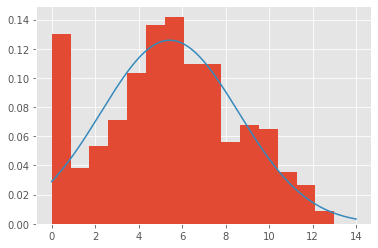

In [24]:
x = np.linspace(0, 14, 300)
y = stats.norm(loc=nod.k1.mean(), scale=nod.k1.std()).pdf(x)

plt.figure()
nod.k1.hist(bins=15, density=True)
plt.plot(x, y)
plt.show()

In [27]:
stats.kstest(nod.k1.values, 'norm', args=(nod.k1.mean(), nod.k1.std()))

KstestResult(statistic=0.052264904482032776, pvalue=0.22936091387357344)

Предположим невероятное! А именно, независимость и одинаковую распределённость наших наблюдений!

__б)__ Постройте примерный $95\%$-й доверительный интервал для ожидамоего результата за первую контрольную.

$$
\left[\bar x - z_{crit} \sqrt{\frac{\hat\sigma^2}{n}} ; \bar x + z_{crit} \sqrt{\frac{\hat\sigma^2}{n}} \right]
$$

In [44]:
alpha = 0.05
n = len(nod.k1.values)

mu = nod.k1.mean()
sd = np.sqrt(nod.k1.var()/n)

z_crit = stats.t(n-1).ppf(1 - alpha/2)

print("Доверительный интервал", mu - z_crit * sd, mu + z_crit * sd)


Доверительный интервал 5.115697343992563 5.746866758571539


In [45]:
alpha = 0.05
n = len(nod.k1.values)

mu = nod.k1.mean()
sd = np.sqrt(nod.k1.var()/n)

z_crit = stats.norm().ppf(1 - alpha/2)

print("Доверительный интервал", mu - z_crit * sd, mu + z_crit * sd)

Доверительный интервал 5.116679224536988 5.745884878027114


Разобьём наши наблюдения на две группы: Ангелы и Демоны. У Ангелов `d1fraud == 0`, у Демонов `d1fraud > 0`.

__в)__ Постройте на общем фоне гистограмму распределения оценок за первую контрольную у Ангелов и Демонов. 

In [47]:
nod[["k1", "d1fraud"]]

,k1,d1fraud
0,10.1,0.0
1,6.7,1.0
2,8.2,0.0
3,7.0,1.0
4,7.0,2.0
...,...,...
385,1.0,1.0
386,0.4,3.0
387,6.2,1.0
388,0.0,NaN


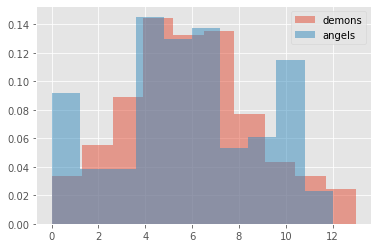

In [50]:
plt.figure()
nod[nod.d1fraud > 0].k1.hist(alpha=0.5, density=True, label="demons")
nod[nod.d1fraud == 0].k1.hist(alpha=0.5, density=True, label="angels")
plt.legend()
plt.show()

__г)__ Постройте примерный $95\%$-й доверительный интервал для разницы ожидаемого результата за первую контрольную у Ангелов и Демонов. Без предположения о равенстве дисперсий.

$$
\left[\bar x - \bar y - z_{crit} \sqrt{\frac{\hat\sigma_x^2}{n_x} + \frac{\hat\sigma_y^2}{n_y}} ; \bar x - \bar y + z_{crit} \sqrt{\frac{\hat\sigma_x^2}{n_x} + \frac{\hat\sigma_y^2}{n_y}} \right]
$$

In [56]:
x = nod[nod.d1fraud > 0].k1
y = nod[nod.d1fraud == 0].k1

alpha = 0.05

mean_diff = x.mean() - y.mean()
sd = np.sqrt(x.var()/x.size + y.var()/y.size)
z_crit = stats.norm().ppf(1 - alpha/2)

print("Доверительный интервал", mean_diff - z_crit * sd, mean_diff + z_crit * sd)

Доверительный интервал -0.532833905384929 0.8087678503390602


__д)__ Как изменятся результаты, если границу между Ангелами и Демонами провести по `d1fraud < 2.5` и `d1fraud > 2.5`?

In [59]:
x = nod[nod.d1fraud > 2.5].k1
y = nod[nod.d1fraud < 2.5].k1

alpha = 0.05

mean_diff = x.mean() - y.mean()
sd = np.sqrt(x.var()/x.size + y.var()/y.size)
z_crit = stats.norm().ppf(1 - alpha/2)

print("Доверительный интервал", mean_diff - z_crit * sd, mean_diff + z_crit * sd)

Доверительный интервал -0.8893352912570267 0.53970010884823


Предположим, что математическое ожидание результата за контрольную зависит от уровня подготовки, а дисперсия результата — от нервов.

__е)__ Проверьте гипотезу об одинаковой нервозности Ангелов и Демонов на уровне значимости $5\%$.

In [63]:
x = nod[nod.d1fraud > 0].k1
y = nod[nod.d1fraud == 0].k1

print("f_observ", x.var() / y.var())

alpha = 0.05

print("Right crit", stats.f.ppf(1 - alpha/2, x.size - 1, y.size - 1))
print("Left crit", stats.f.ppf(alpha/2, x.size - 1, y.size - 1))


f_observ 0.8546097465268333
Right crit 1.3923435659305086
Left crit 0.733126241700228


__ё)__ Без буквы `ё` никуда, скажут нам [Пафнутий Чебышёв](https://ru.wikipedia.org/wiki/%D0%A7%D0%B5%D0%B1%D1%8B%D1%88%D1%91%D0%B2,_%D0%9F%D0%B0%D1%84%D0%BD%D1%83%D1%82%D0%B8%D0%B9_%D0%9B%D1%8C%D0%B2%D0%BE%D0%B2%D0%B8%D1%87) и [Лёв Толстой](https://arzamas.academy/special/ruslit/writers/tolstoy).  

Нарисуйте симпатичную картинку для корреляционной матрицы по задачам первой контрольной для всех наблюдений, отдельно для Ангелов и Демонов. 

In [71]:
columns = ['k1a','k1b', 'k1c', 'k1d', 'k1e', 'k1f']


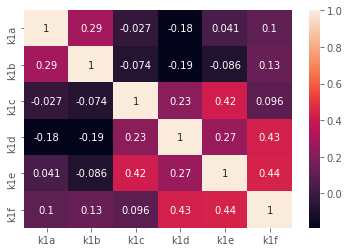

In [74]:
sns.heatmap(nod[nod.d1fraud > 0][columns].dropna().corr(), annot=True)

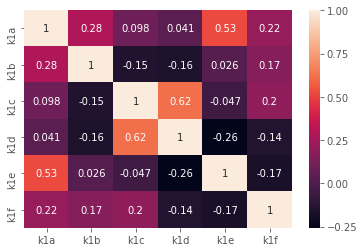

In [75]:
sns.heatmap(nod[nod.d1fraud == 0][columns].dropna().corr(), annot=True)

# Симуляционная задачулька 2 про повторное тестирование

Сказка про то, что последовательное применение тестов без корректировки — это не очень хорошо :)

Жизнь исследователя Винни-Пуха прекрасна. Наблюдений много, гипотеза о равенстве ожиданий верна, а наблюдения — нормальны. 

А именно, величины $X_1$, ..., $X_{n}$ независимы и нормальны $N(0;1)$, величины $Y_1$, ..., $Y_n$ независимы и нормальны $N(0;2)$. И пусть $n_x=100$ и $n_y=200$.



Винни-Пух правда этого ничего не знает, потому что у него в голове опилки, и тестирует сначала гипотезу о равенстве дисперсий двух выборок на уровне значимости $5\%$.

__а)__ Проведите $10^6$ экспериментов, то есть $10^6$ раз попробуйте за Винни-Пуха проверить гипотезу. Хорошо бы $10^8$, но оттестируйте сначала свой код на $10^6$. 

Постройте гистограмму распределения тестовой статистики о равенстве дисперсий. В скольки процентах случаев гипотеза о равенстве дисперсий отвергнута? 

/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:1680: RuntimeWarning: divide by zero encountered in log
  lPx = m/2 * np.log(m) + n/2 * np.log(n) + (n/2 - 1) * np.log(x)


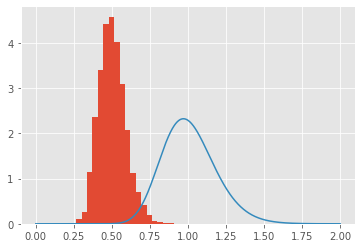

In [78]:
nx = 100
ny = 200

sumulations_count = int(1e4)
alpha = 0.05

f_distibution = stats.f(nx - 1, ny - 1)
left_border = f_distibution.ppf(alpha / 2)
right_border = f_distibution.ppf(1 -alpha / 2)

statistics = []
some_list = []

for _ in range(sumulations_count):
    x = np.random.normal(0, 1, nx)
    y = np.random.normal(0, np.sqrt(2), ny)
    f_statistic = x.var() / y.var()
    statistics.append(f_statistic)

    if left_border < f_statistic < right_border:
        some_list.append((x, y))
        
        
xs = np.linspace(0, 2, 1000)
ys = f_distibution.pdf(xs)

plt.figure()
plt.hist(statistics, bins=20, density=True)
plt.plot(xs, ys)
plt.show() 



In [80]:
len(some_list) / 1e4

0.0223

__б)__ Если гипотеза о равенстве дисперсий не отвергается, то Винни использует $t$-статистику для проверки гипотезы о равенстве ожиданий при равенстве дисперсий. 

Для тех экспериментов, в которых гипотеза о равенстве дисперсий не отверглась, проверьте гипотезу о равенстве ожиданий на уровне значимости $5\%$. 

Постройте гистограмму распределения $t$-статистики. В скольки процентах случаев гипотеза о равенстве ожиданий отвергнута?

In [ ]:
# решение

__в)__ Словами объясните, почему нехорошо сначала тестировать на равенство дисперсий, а потом на равенство средних при равных дисперсиях, если на первом шаге гипотеза $H_0$ не отверглась. 

# Задачулька 3 о мимимишных мышках

[https://nplus1.ru/news/2018/05/11/mice-trolley](https://nplus1.ru/news/2018/05/11/mice-trolley) 

Для изучения аспектов процесса принятия моральных решений психологи уже много лет используют этические дилеммы, с помощью которых оценивают действия людей в гипотетических ситуациях. Один из самых известных примеров — это [проблема вагонетки,](https://ru.wikipedia.org/wiki/Проблема_вагонетки) в которой необходимо принять решение о том, стоит ли пожертвовать одним человеком для спасения пятерых.

Бельгийские психологи воплотили дилемму в реальную жизнь. Участники эксперимента должны были выбрать, ударить током пять мышей или одну мышь. Эксперимент проходил следующим образом. Участника сажали перед двумя клетками, в одной из которых сидели пять мышей, а в другой — одна. Перед клетками стоял ноутбук с $20$-секундным таймером: участникам сообщили, что по истечении этих $20$ секунд в клетку с пятью мышами пустят ток, и мыши получат не смертельный, но очень болезненный удар. Пока время идет, участник может нажать на кнопку: в этом случае ток пустят по клетке с одной мышью. В исследовании использовали живых мышей; следует, однако, уточнить, что удары тока были ненастоящими: сразу же после «удара» участников сопроводили в отдельную комнату, где разъяснили им, что мыши в полном порядке и током их не били (об этом заранее догадались только $12$ участников). В решении реальной проблемы вагонетки приняли участие $192$ человека, а еще $83$ решали такую же задачку, но гипотетическую (на бумаге). Все участники также прошли онлайн-опросы, в ходе которых учёные собрали о респондентах кучу дополнительной информации. 

В файле `mouse.csv` лежит информация о том, как прошёл эксперимент. Нас будут интересовать столбцы: 

* __STUDY:__ какую проблему вагонетки решал человек $1$ если реальную, $2$ если на бумаге
* __AGE:__ возраст респондента 
* __GENDER:__ пол респондента
* __DECISION:__ решение дилеммы ($1$ - жать на кнопу, $0$ - не жать) 
* __RT:__ время, которое респондент потратил, чтобы нажать на кнопку 

Подробное описание данных, сами данные и даже код на R, использованный при оценивании моделей, можно найти в [репозитории исследования.](https://osf.io/kvb99/) В статье авторы строили кучу логистических регрессий, чтобы очистить эффект от психологических особенностей респондентов. Этому добру вас будут учить на эконометрике, мы пойдём простым и не совсем правильным путём и будем проверять гипотезы в лоб. 

In [12]:
df = pd.read_csv("mouse.csv", sep="\t")
df.head()

,STUDY,AGE,GENDER,DECISION,DEO1,DEO2,DEO3,DEO4,DEO5,DEO6,...,AE,MOUSE1,MOUSE2,MOUSE3,MOUSE,DOUBT,OTHERCHOICE,UNCOMFORTABLE,NOSHOCK,RT
0,1,38,1,NaN,2,2,2,1,2,2,...,5.000000,6.0,5.0,5.0,5.333333,NaN,NaN,NaN,NaN,NaN
1,1,22,1,NaN,1,2,2,1,2,1,...,5.727273,5.0,6.0,6.0,5.666667,NaN,NaN,NaN,NaN,NaN
2,1,39,1,NaN,1,1,3,5,3,1,...,5.545455,6.0,6.0,6.0,6.000000,NaN,NaN,NaN,NaN,NaN
3,1,21,0,1.0,2,3,3,3,3,2,...,5.136364,4.0,7.0,7.0,6.000000,2.0,0.0,6.0,80.0,9.212427
4,1,20,0,1.0,4,2,2,2,2,2,...,4.181818,4.0,6.0,6.0,5.333333,4.0,0.0,6.5,75.0,17.071711


__Отдавайте себе отчёт о предпосылках теста, который вы используете.__


__а)__ Попытаемся ответить на тот же вопрос, что и исследователи. В какой из двух ситуаций респонденты чащи принимают решение нажать кнопку: в реальной или на бумаге?

In [ ]:
# решение

__б)__ Правда ли, что женщины и мужчины принимают решению о нажатии на кнопку одинаково часто? А на бумаге?

In [ ]:
# решение

__в)__ Правда ли, что женщины намного кровожаднее мужчин и жмут на кнопку гораздо быстрее?

In [ ]:
# решение

__в)__ Предположим, что дисперсия времени нажатия на кнопку определяется эмоциональностью и романтичностью индивида. Правда ли, что романтичность женщин равна романтичности мужчин? 

In [ ]:
# решение


<img src="https://pp.userapi.com/c852220/v852220032/14dce1/r1zXBIig4B8.jpg" height="300" width="600"> 